1. Tập dữ liệu (Dataset)

    * Nguồn dữ liệu: Dogs vs Cats từ Kaggle

    * Số lượng ảnh: khoảng 25.000 ảnh huấn luyện và 12.500 ảnh kiểm thử

    * Nhãn (Labels):

        * 0 = Chó

        * 1 = Mèo

    * Mục tiêu dự án: giúp thực hành về deep learning, xử lý ảnh, và đánh giá mô hình với dữ liệu thực tế.

In [75]:
# Basic Data Processing
import pandas as pd
import numpy as np
import os
import random
from pathlib import Path
import zipfile

# Image Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import shutil
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning Framework
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.callbacks as keras_callback

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
# Visualization
import plotly.express as px
import plotly.graph_objects as go

# Progress Bar
from tqdm import tqdm

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Extras for Grad-CAM
import tensorflow.keras.backend as K

# Test imports
print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

✅ All libraries imported successfully!
TensorFlow version: 2.20.0
GPU Available: []


2. Thiết lập và trích xuất dữ liệu (Dataset Setup and Extraction)

    * Trong phần này, chúng ta định nghĩa các đường dẫn tệp cho tập dữ liệu Dogs vs Cats và chuẩn bị các thư mục làm việc.

        * Kiểm tra tệp nén: mã nguồn sẽ kiểm tra xem các tệp nén của tập huấn luyện và kiểm thử đã được giải nén hay chưa.

        * Giải nén dữ liệu: nếu chưa, các tệp này sẽ được giải nén vào các thư mục đã chỉ định.

        * Đếm số lượng tệp: sau khi giải nén, chương trình sẽ đếm số lượng tệp trong thư mục huấn luyện và kiểm thử để đảm bảo tất cả ảnh đều có sẵn.

    * Bước này giúp đảm bảo tập dữ liệu được tổ chức hợp lý và sẵn sàng cho quá trình tiền xử lý cũng như huấn luyện mô hình.

In [76]:
# Define paths
base_path = './input/dogs-vs-cats-data'
train_zip = os.path.join(base_path, 'train.zip')
test_zip = os.path.join(base_path, 'test1.zip')

# Extract directories
extract_path = './input/dogs-vs-cats-data'
TRAIN_DIR = os.path.join(extract_path, 'train')
TEST_DIR = os.path.join(extract_path, 'test1')

print("\nChecking dataset directories...")

# Extract train.zip if not already extracted
if not os.path.exists(TRAIN_DIR):
    print("Extracting train.zip...")
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(train_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Train extraction completed!")
else:
    print("Train directory already exists")

# Extract test1.zip if not already extracted
if not os.path.exists(TEST_DIR):
    print("Extracting test1.zip...")
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(test_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Test extraction completed!")
else:
    print("Test directory already exists")

# Check if directories exist and count files
if os.path.exists(TRAIN_DIR):
    train_files = [f for f in os.listdir(TRAIN_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print("Training directory found:", len(train_files), "files")
else:
    print("Training directory not found!")
    train_files = []

if os.path.exists(TEST_DIR):
    test_files = [f for f in os.listdir(TEST_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print("Test directory found:", len(test_files), "files")
else:
    print("Test directory not found!")
    test_files = []

print("\nFinal paths:")
print("TRAIN_DIR:", TRAIN_DIR)
print("TEST_DIR:", TEST_DIR)


Checking dataset directories...
Train directory already exists
Test directory already exists
Training directory found: 25000 files
Test directory found: 12500 files

Final paths:
TRAIN_DIR: ./input/dogs-vs-cats-data\train
TEST_DIR: ./input/dogs-vs-cats-data\test1


3. Khám phá và trực quan hóa dữ liệu (Dataset Exploration and Visualization)

    * Phần này tiến hành khám phá tập dữ liệu Dogs vs Cats để hiểu rõ nội dung và cấu trúc của nó.

        * Đếm số lượng ảnh: xác định có bao nhiêu ảnh chó và mèo trong tập huấn luyện, đồng thời hiển thị một vài ảnh mẫu từ mỗi lớp.

        * Phân tích kích thước ảnh: hiển thị giá trị nhỏ nhất, lớn nhất và trung bình của chiều rộng và chiều cao ảnh, kèm theo biểu đồ histogram để quan sát phân bố.

        * Trực quan hóa phân bố lớp: sử dụng biểu đồ tròn (pie chart) để thể hiện tỷ lệ chó và mèo trong tập dữ liệu.

    * Việc khám phá này giúp chúng ta hiểu rõ tập dữ liệu trước khi bắt đầu tiền xử lý và huấn luyện mô hình.


Exploring dataset...
Dog images: 12500
Cat images: 12500
Total training images: 25000
Sample dog files: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg']
Sample cat files: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

Showing sample images...


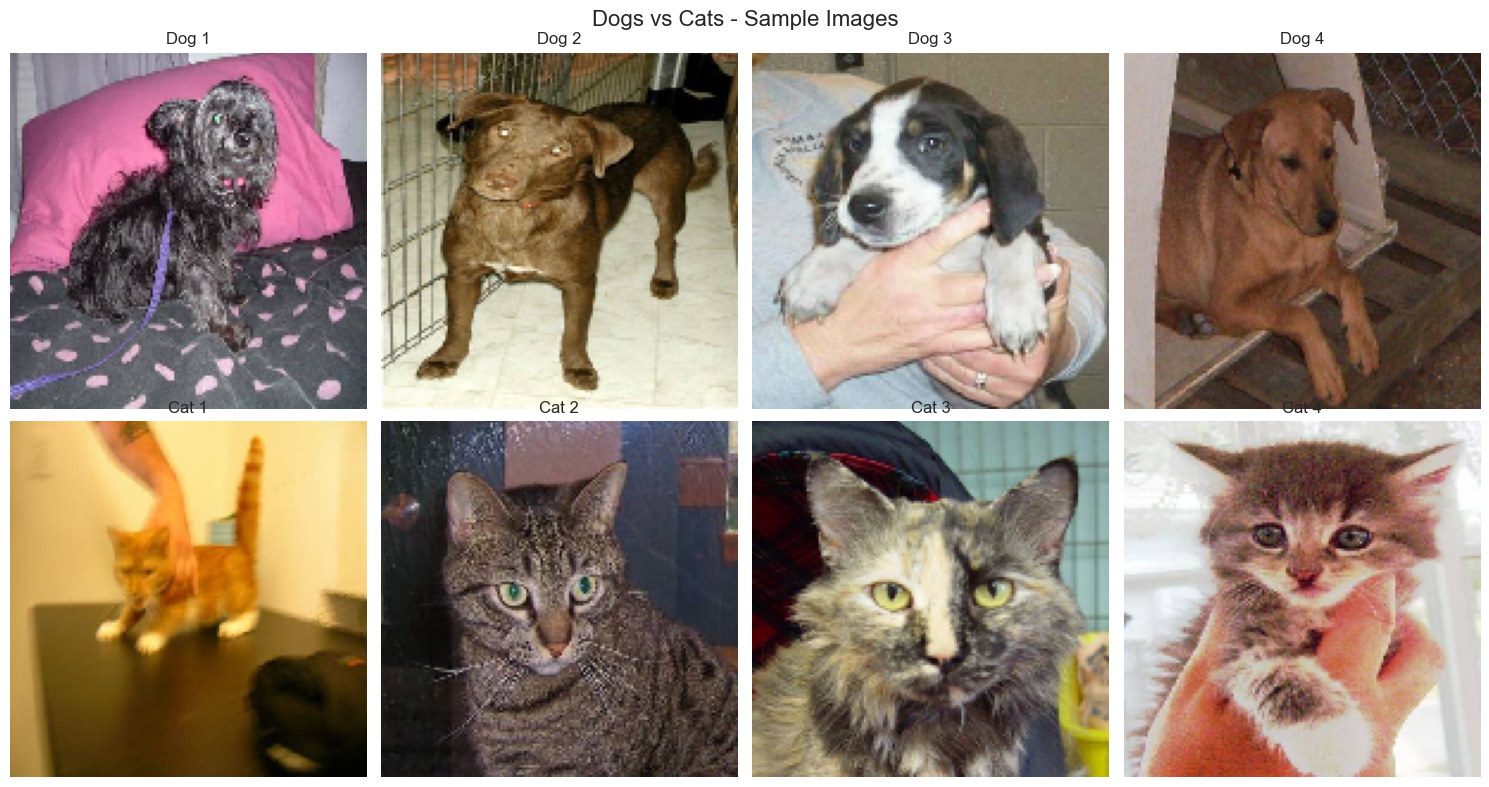


Analyzing image sizes...
Width - Min: 112 Max: 500 Average: 406
Height - Min: 75 Max: 500 Average: 361


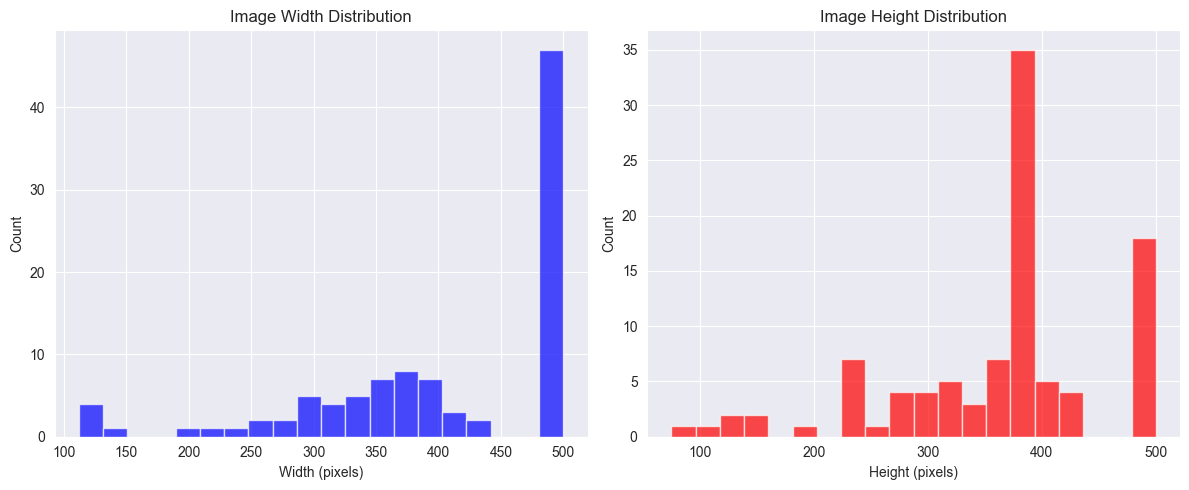


Class distribution:


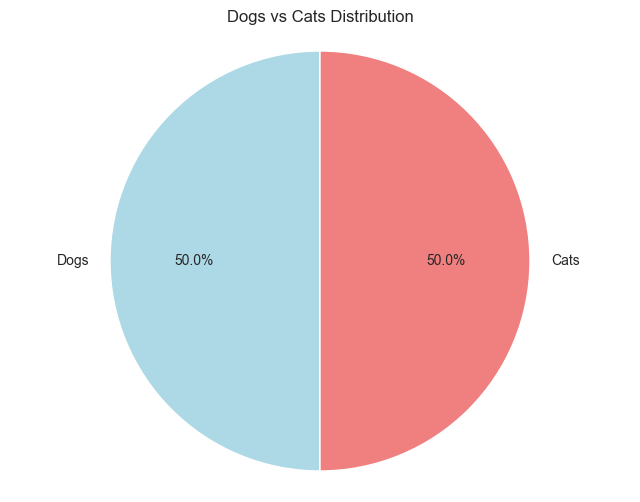

Dogs: 12500 images
Cats: 12500 images
Dog percentage: 50.0 %
Cat percentage: 50.0 %

Dataset setup completed!


In [77]:
def explore_dataset():
    print("\nExploring dataset...")

    if not train_files:
        print("No training files found!")
        return [], [], []

    # Count dogs and cats
    dog_files = []
    cat_files = []

    for filename in train_files:
        if 'dog' in filename.lower():
            dog_files.append(filename)
        elif 'cat' in filename.lower():
            cat_files.append(filename)

    print("Dog images:", len(dog_files))
    print("Cat images:", len(cat_files))
    print("Total training images:", len(train_files))

    if dog_files:
        print("Sample dog files:", dog_files[:3])
    if cat_files:
        print("Sample cat files:", cat_files[:3])

    return train_files, dog_files, cat_files

# Run exploration
if train_files:
    train_files, dog_files, cat_files = explore_dataset()
else:
    dog_files, cat_files = [], []

# Display sample images
def show_sample_images():
    print("\nShowing sample images...")

    if not train_files:
        print("No images to display!")
        return

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle('Dogs vs Cats - Sample Images', fontsize=16)

    if dog_files and cat_files:
        # Show 4 dog images
        for i in range(min(4, len(dog_files))):
            img_path = os.path.join(TRAIN_DIR, dog_files[i])
            img = load_img(img_path, target_size=(150, 150))
            axes[0, i].imshow(img)
            axes[0, i].set_title('Dog ' + str(i+1))
            axes[0, i].axis('off')

        # Show 4 cat images
        for i in range(min(4, len(cat_files))):
            img_path = os.path.join(TRAIN_DIR, cat_files[i])
            img = load_img(img_path, target_size=(150, 150))
            axes[1, i].imshow(img)
            axes[1, i].set_title('Cat ' + str(i+1))
            axes[1, i].axis('off')
    else:
        # Show first 8 images
        for i in range(min(8, len(train_files))):
            row = i // 4
            col = i % 4
            img_path = os.path.join(TRAIN_DIR, train_files[i])
            try:
                img = load_img(img_path, target_size=(150, 150))
                axes[row, col].imshow(img)
                axes[row, col].set_title('Image ' + str(i+1))
                axes[row, col].axis('off')
            except:
                axes[row, col].text(0.5, 0.5, 'Error', ha='center', va='center')
                axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Show images
if train_files:
    show_sample_images()

# Analyze image sizes
def analyze_images(sample_size=100):
    print("\nAnalyzing image sizes...")

    if not train_files:
        print("No images to analyze!")
        return

    widths = []
    heights = []

    # Take random sample
    sample_files = random.sample(train_files, min(sample_size, len(train_files)))

    for filename in sample_files:
        img_path = os.path.join(TRAIN_DIR, filename)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
        except:
            continue

    if widths:
        print("Width - Min:", min(widths), "Max:", max(widths), "Average:", int(np.mean(widths)))
        print("Height - Min:", min(heights), "Max:", max(heights), "Average:", int(np.mean(heights)))

        # Plot histograms
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        ax1.hist(widths, bins=20, color='blue', alpha=0.7)
        ax1.set_title('Image Width Distribution')
        ax1.set_xlabel('Width (pixels)')
        ax1.set_ylabel('Count')

        ax2.hist(heights, bins=20, color='red', alpha=0.7)
        ax2.set_title('Image Height Distribution')
        ax2.set_xlabel('Height (pixels)')
        ax2.set_ylabel('Count')

        plt.tight_layout()
        plt.show()

# Analyze images
if train_files:
    analyze_images()

# Show class distribution
def show_class_distribution():
    print("\nClass distribution:")

    if not dog_files and not cat_files:
        print("Cannot show distribution - no labeled data!")
        return

    # Create pie chart
    labels = ['Dogs', 'Cats']
    sizes = [len(dog_files), len(cat_files)]
    colors = ['lightblue', 'lightcoral']

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Dogs vs Cats Distribution')
    plt.axis('equal')
    plt.show()

    print("Dogs:", len(dog_files), "images")
    print("Cats:", len(cat_files), "images")
    total = len(dog_files) + len(cat_files)
    print("Dog percentage:", round(len(dog_files)/total*100, 1), "%")
    print("Cat percentage:", round(len(cat_files)/total*100, 1), "%")

# Show distribution
if dog_files or cat_files:
    show_class_distribution()

print("\nDataset setup completed!")

4. Tiền xử lý dữ liệu (Data Preprocessing)
Trong bước này, chúng ta chuẩn bị tập dữ liệu để huấn luyện mô hình CNN.

    * Gán nhãn cho ảnh: chó = 0, mèo = 1.

    * Chia dữ liệu: thành ba tập — huấn luyện (60%), kiểm định (20%), và kiểm thử (20%).

    * Tổ chức dữ liệu: sắp xếp các tệp vào các thư mục riêng cho từng tập và từng lớp.

    * Tạo bộ sinh dữ liệu (Data Generators): sử dụng ImageDataGenerator của TensorFlow.

        * Bộ sinh cho tập huấn luyện bao gồm data augmentation như xoay, dịch chuyển, phóng to/thu nhỏ, lật ảnh, và thay đổi độ sáng.

        * Bộ sinh cho tập kiểm định và kiểm thử chỉ thực hiện chuẩn hóa ảnh.

    * Xác minh tiền xử lý: hiển thị một vài ảnh đã được tiền xử lý và kiểm tra tóm tắt về kích thước ảnh, kích thước batch, và số lượng mẫu.

Starting data preprocessing...

Step 1: Creating labels and splitting data...
Total labeled images: 25000
Dogs: 12500 Cats: 12500
Train: 15000, Validation: 5000, Test: 5000

Step 2: Organizing files...
Files organized successfully!

Step 3: Creating data generators...
Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Data generators created!
Training samples: 15000
Validation samples: 5000
Test samples: 5000

Step 4: Verifying preprocessing...


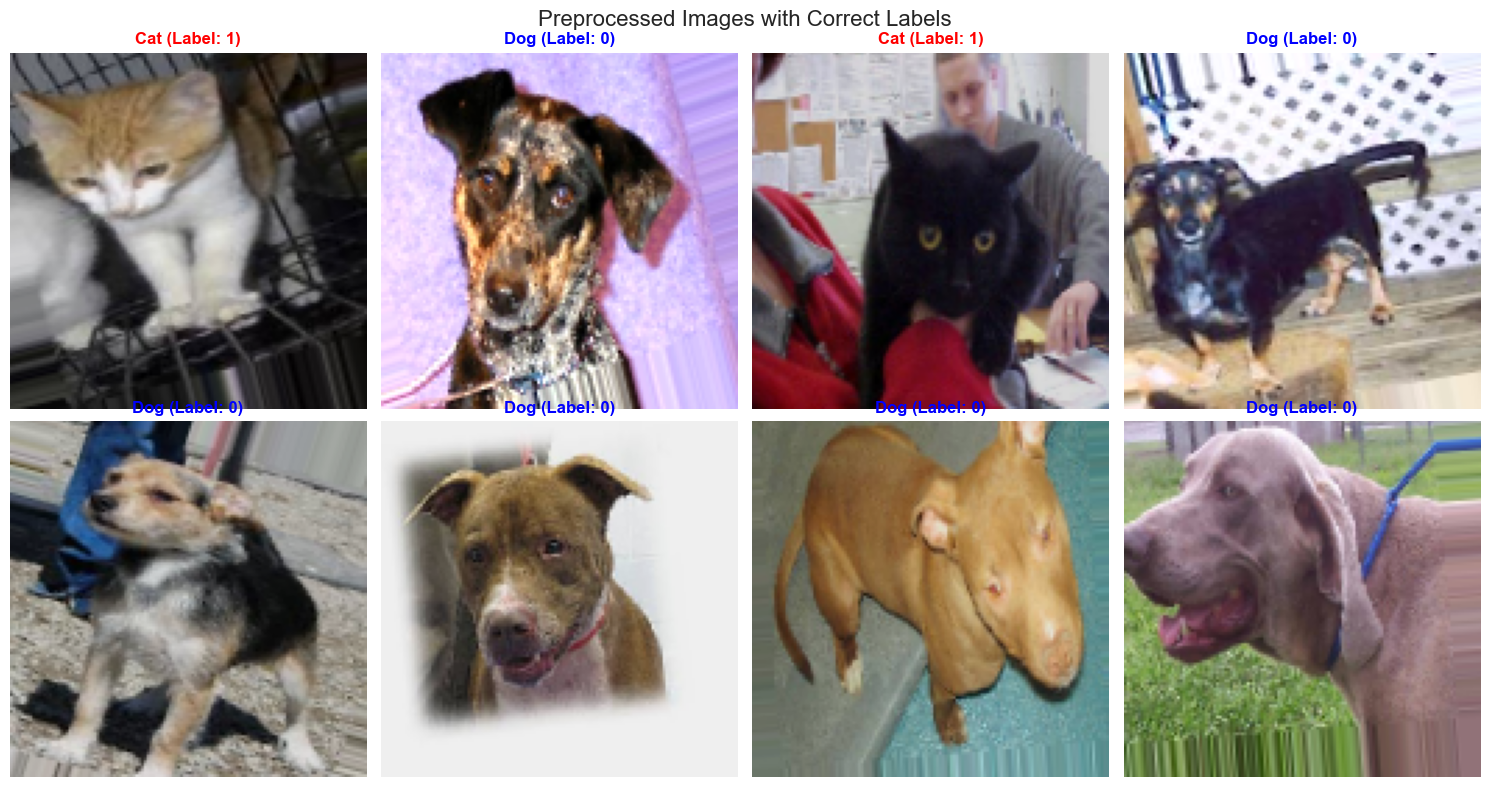


Preprocessing Summary:
Image size: 128x128
Batch size: 32
Classes: Dogs=0, Cats=1
Training images: 15000
Validation images: 5000
Test images: 5000
Steps per epoch: 468

Data augmentation applied to training set:
- Rotation, shifting, zoom, flip, brightness

Data preprocessing completed!


In [78]:
print("Starting data preprocessing...")

# STEP 1: CREATE LABELS AND SPLIT DATA
print("\nStep 1: Creating labels and splitting data...")

# Create lists for image paths and labels
image_paths = []
labels = []

for filename in train_files:
    full_path = os.path.join(TRAIN_DIR, filename)
    image_paths.append(full_path)

    # Label: dogs=0, cats=1
    if 'dog' in filename.lower():
        labels.append(0)
    elif 'cat' in filename.lower():
        labels.append(1)

print("Total labeled images:", len(labels))
print("Dogs:", labels.count(0), "Cats:", labels.count(1))

# Split data: 60% train, 20% validation, 20% test
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.25, random_state=42, stratify=train_labels
)

print(f"Train: {len(train_paths)}, Validation: {len(val_paths)}, Test: {len(test_paths)}")

# STEP 2: ORGANIZE FILES INTO FOLDERS
print("\nStep 2: Organizing files...")

# Create directory structure
organized_dir = './input/processing/organized_data'
dirs = [
    os.path.join(organized_dir, 'train', 'dogs'),
    os.path.join(organized_dir, 'train', 'cats'),
    os.path.join(organized_dir, 'validation', 'dogs'),
    os.path.join(organized_dir, 'validation', 'cats'),
    os.path.join(organized_dir, 'test', 'dogs'),
    os.path.join(organized_dir, 'test', 'cats')
]

for directory in dirs:
    os.makedirs(directory, exist_ok=True)

# Copy files to organized structure
def copy_files(paths, labels, base_dir):
    for path, label in zip(paths, labels):
        filename = os.path.basename(path)
        if label == 0:  # Dog
            dest = os.path.join(base_dir, 'dogs', filename)
        else:  # Cat
            dest = os.path.join(base_dir, 'cats', filename)

        if not os.path.exists(dest):
            shutil.copy2(path, dest)

copy_files(train_paths, train_labels, os.path.join(organized_dir, 'train'))
copy_files(val_paths, val_labels, os.path.join(organized_dir, 'validation'))
copy_files(test_paths, test_labels, os.path.join(organized_dir, 'test'))

print("Files organized successfully!")

# STEP 3: CREATE DATA GENERATORS
print("\nStep 3: Creating data generators...")

# Training generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixels to 0-1
    rotation_range=20,           # Rotate images
    width_shift_range=0.1,       # Shift horizontally
    height_shift_range=0.1,      # Shift vertically
    zoom_range=0.1,              # Zoom in/out
    horizontal_flip=True,        # Flip horizontally
    brightness_range=[0.8, 1.2], # Change brightness
    fill_mode='nearest'
)

# Validation and test generators (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data flows
IMG_SIZE = 128  # ← MODEL INPUT
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    os.path.join(organized_dir, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),  # 128x128
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['dogs', 'cats'],  # dogs=0, cats=1
    shuffle=True,
    seed=42
)

validation_generator = val_test_datagen.flow_from_directory(
    os.path.join(organized_dir, 'validation'),
    target_size=(IMG_SIZE, IMG_SIZE),  # 128x128
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['dogs', 'cats'],
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(organized_dir, 'test'),
    target_size=(IMG_SIZE, IMG_SIZE),  # 128x128
    batch_size=BATCH_SIZE,
    class_mode='binary',
    classes=['dogs', 'cats'],
    shuffle=False
)

print("Data generators created!")
print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)
print("Test samples:", test_generator.samples)

# STEP 4: VERIFY PREPROCESSING
print("\nStep 4: Verifying preprocessing...")

def show_preprocessed_samples():
    """Show sample preprocessed images with correct labels"""
    images, labels = next(train_generator)

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle('Preprocessed Images with Correct Labels', fontsize=16)

    for i in range(8):
        row = i // 4
        col = i % 4

        axes[row, col].imshow(images[i])

        if labels[i] == 0:
            class_name = "Dog"
            color = 'blue'
        else:
            class_name = "Cat"
            color = 'red'

        axes[row, col].set_title(f'{class_name} (Label: {int(labels[i])})',
                                color=color, fontweight='bold')
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

show_preprocessed_samples()

# STEP 5: SUMMARY
print("\nPreprocessing Summary:")
print("=" * 40)
print(f"Image size: {IMG_SIZE}x{IMG_SIZE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Classes: Dogs=0, Cats=1")
print(f"Training images: {train_generator.samples}")
print(f"Validation images: {validation_generator.samples}")
print(f"Test images: {test_generator.samples}")
print(f"Steps per epoch: {train_generator.samples // BATCH_SIZE}")
print("\nData augmentation applied to training set:")
print("- Rotation, shifting, zoom, flip, brightness")
print("\nData preprocessing completed!")

5. Xây dựng mô hình CNN (CNN Model Building)

    * Trong bước này, chúng ta xây dựng một Mạng Nơ-ron Tích chập (Convolutional Neural Network - CNN) để phân loại chó và mèo. CNN là một loại mạng nơ-ron đặc biệt dành cho xử lý ảnh, có khả năng phát hiện các đặc trưng như cạnh, hình dạng và kết cấu.

        * Mô hình cơ bản (Basic CNN):

            * Gồm ba khối tích chập (convolutional blocks), mỗi khối đi kèm với một lớp max pooling.

            * Sau đó là lớp flatten, một lớp dense, và một lớp dropout để giảm hiện tượng overfitting.

            * Lớp đầu ra sử dụng hàm kích hoạt sigmoid cho bài toán phân loại nhị phân (0 = chó, 1 = mèo).

        * Mô hình cải tiến (Improved CNN):

            * Gồm bốn khối tích chập thay vì ba.

            * Thêm các lớp dense để tăng khả năng học đặc trưng.

        * Biên dịch mô hình (Model Compilation):

            * Cả hai mô hình đều sử dụng Adam optimizer, binary crossentropy loss, và accuracy làm thước đo.

            * Thiết lập các callbacks như early stopping và learning rate reduction để cải thiện quá trình huấn luyện.

        * Kiểm tra mô hình (Model Summary):

            * Xem lại tóm tắt mô hình và kiểm tra tổng số tham số có thể huấn luyện.

            * Chuẩn bị mô hình cho quá trình huấn luyện với dữ liệu đã được tiền xử lý.

In [79]:
print("Starting CNN model building...")

from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# STEP 1: CREATE SIMPLIFIED CNN MODEL
print("\nStep 1: Creating simplified CNN architecture...")

def create_simplified_cnn():
    """
    Create a simplified CNN model
    """
    model = models.Sequential()

    # INPUT
    model.add(layers.Input(shape=(128, 128, 3)))

    # BLOCK 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # BLOCK 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # BLOCK 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # CLASSIFIER HEAD
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Create simplified model
simplified_model = create_simplified_cnn()

print("Simplified CNN Model Summary:")
simplified_model.summary()

# Compile simplified model
simplified_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Simplified model compiled!")

# STEP 2: SETUP TRAINING CALLBACKS
print("\nStep 2: Setting up training callbacks...")

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

callbacks = [early_stopping, reduce_lr]

print("Callbacks configured.")

# STEP 3: PREPARE FOR TRAINING
print("\nStep 3: Preparing for training...")

# Batch size = 64
train_generator.batch_size = 64
validation_generator.batch_size = 64

# Epoch
EPOCHS = 15

train_steps = train_generator.samples // train_generator.batch_size
val_steps = validation_generator.samples // validation_generator.batch_size

print(f"Training steps per epoch: {train_steps}")
print(f"Validation steps per epoch: {val_steps}")
print(f"Epochs: {EPOCHS}")

# STEP 4: READY TO TRAIN
print("\nModel Training Setup Summary:")
print("=" * 50)
print("✓ Simplified CNN model created (3 conv blocks)")
print("✓ Input size: 128x128x3")
print("✓ Batch size: 64")
print("✓ Epochs: 15")
print("✓ Optimizer: Adam (lr=0.0005)")
print("✓ Binary crossentropy loss")
print("✓ EarlyStopping & ReduceLROnPlateau callbacks")
print("✓ Ready for training!")

Starting CNN model building...

Step 1: Creating simplified CNN architecture...
Simplified CNN Model Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,482,369 (32.36 MB)

 Trainable params: 8,482,369 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

Simplified model compiled!

Step 2: Setting up training callbacks...
Callbacks configured.

Step 3: Preparing for training...
Training steps per epoch: 234
Validation steps per epoch: 78
Epochs: 15

Model Training Setup Summary:
✓ Simplified CNN model created (3 conv blocks)
✓ Input size: 128x128x3
✓ Batch size: 64
✓ Epochs: 15
✓ Optimizer: Adam (lr=0.0005)
✓ Binary crossentropy loss
✓ EarlyStopping & ReduceLROnPlateau callbacks
✓ Ready for training!


6. Huấn luyện mô hình (Model Training)

    Trong bước này, chúng ta tiến hành huấn luyện mô hình CNN đã chọn bằng dữ liệu đã được tiền xử lý. Số lượng epochs được đặt là 20 và sử dụng early stopping để ngăn ngừa hiện tượng overfitting nếu validation loss ngừng cải thiện.

    Trong quá trình huấn luyện, mô hình học cách nhận diện chó và mèo từ các ảnh. Sau khi huấn luyện xong, ta vẽ biểu đồ accuracy và loss để quan sát hiệu suất của mô hình trên cả tập huấn luyện và tập kiểm định.

    Cuối cùng, mô hình đã huấn luyện cùng trọng số của nó sẽ được lưu vào các tệp để có thể sử dụng lại sau này mà không cần huấn luyện lại. Đồng thời, lịch sử huấn luyện cũng được lưu lại để tham khảo.

    Bước này hoàn tất quá trình huấn luyện và chuẩn bị cho việc đánh giá mô hình.

Starting model training...
Training for 15 epochs...
Training images: 15000
Validation images: 5000
Epoch 1/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 197s 839ms/step - accuracy: 0.5495 - loss: 0.6942 - val_accuracy: 0.6002 - val_loss: 0.6532
Epoch 2/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.5938 - loss: 0.6525 - val_accuracy: 0.5931 - val_loss: 0.6557
Epoch 3/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 145s 618ms/step - accuracy: 0.6634 - loss: 0.6101 - val_accuracy: 0.7143 - val_loss: 0.5531
Epoch 4/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.6875 - loss: 0.5593 - val_accuracy: 0.7119 - val_loss: 0.5539
Epoch 5/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.7047 - loss: 0.5720 - val_accuracy: 0.7388 - val_loss: 0.5231
Epoch 6/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.7500 - loss: 0.5186 - val_accuracy: 0.7400 - val_loss: 0.5220
Epoch 7/15
234/234 ━━━━━━━━━━━━━━━━━━━━ 227s 971ms/step - accuracy: 0.7208 - loss: 0.5477 - val_accuracy: 0.7524 - va

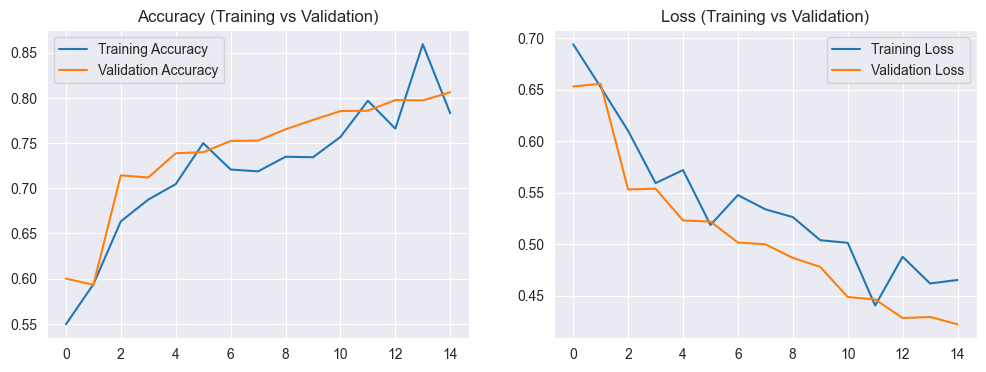

Final Training Accuracy: 0.7830
Final Validation Accuracy: 0.8063
Final Training Loss: 0.4652
Final Validation Loss: 0.4222

Step 4: Saving trained model...
✓ Model saved successfully: ./output/dogs_cats_trained_model.keras
✓ Weights saved successfully: ./output/model.weights.h5
✓ Model file size: 97.1 MB
✓ Weights file size: 97.1 MB

Testing model loading...
✓ Model loading test successful!
✓ Training history saved: ./output/training_history.pkl

TRAINING AND SAVING COMPLETED!
✓ Model trained successfully
✓ Training graphs displayed
✓ Model saved to file (.keras format)
✓ Ready for evaluation!


In [80]:
print("Starting model training...")

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import pickle
from tensorflow.keras.models import load_model

# Step 1: Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Step 2: Train the model
# EPOCHS = 15
print(f"Training for {EPOCHS} epochs...")
print(f"Training images: {train_generator.samples}")
print(f"Validation images: {validation_generator.samples}")

history = simplified_model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=val_steps,
    callbacks=callbacks,
    verbose=1
)

print("Training completed!")

# Step 3: Plot Accuracy & Loss graphs
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy (Training vs Validation)')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss (Training vs Validation)')

    plt.show()

    # Print final metrics
    print(f"Final Training Accuracy: {acc[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
    print(f"Final Training Loss: {loss[-1]:.4f}")
    print(f"Final Validation Loss: {val_loss[-1]:.4f}")

plot_training_history(history)

# Step 4: Save the trained model
print("\nStep 4: Saving trained model...")

try:
    # Save complete model in native Keras format
    model_path = './output/dogs_cats_trained_model.keras'
    simplified_model.save(model_path)
    print(f"✓ Model saved successfully: {model_path}")

    # Save weights separately (optional backup)
    weights_path = './output/model.weights.h5'
    simplified_model.save_weights(weights_path)
    print(f"✓ Weights saved successfully: {weights_path}")

    # Check file sizes
    model_size = os.path.getsize(model_path) / (1024*1024)  # MB
    weights_size = os.path.getsize(weights_path) / (1024*1024)  # MB

    print(f"✓ Model file size: {model_size:.1f} MB")
    print(f"✓ Weights file size: {weights_size:.1f} MB")

    # Test loading to make sure it works
    print("\nTesting model loading...")
    test_model = load_model(model_path)
    print("✓ Model loading test successful!")

    # Save training history
    history_path = './output/training_history.pkl'
    with open(history_path, 'wb') as f:
        pickle.dump(history.history, f)
    print(f"✓ Training history saved: {history_path}")

except Exception as e:
    print(f"❌ Error saving model: {e}")
    print("Training completed but model not saved!")

print("\n" + "="*50)
print("TRAINING AND SAVING COMPLETED!")
print("="*50)
print("✓ Model trained successfully")
print("✓ Training graphs displayed")
print("✓ Model saved to file (.keras format)")
print("✓ Ready for evaluation!")

```python
import numpy as np
from typing import Optional, List, Dict, Any
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

def to_labels(preds: np.ndarray) -> np.ndarray:
    """Convert model output to integer labels (handles binary/prob/multi-class)."""
    if preds.ndim == 1 or preds.shape[1] == 1:
        # binary prob or single-logit
        return (preds.ravel() >= 0.5).astype(int)
    else:
        return np.argmax(preds, axis=1)

def evaluate_model(model, X: np.ndarray, y: np.ndarray, batch_size: int = 32,
                   class_names: Optional[List[str]] = None) -> Dict[str, Any]:
    """
    Run model.predict on X, compute accuracy, precision, recall, f1 (macro),
    confusion matrix and (if possible) ROC AUC (one-vs-rest).
    """
    preds_prob = model.predict(X, batch_size=batch_size)
    y_pred = to_labels(preds_prob)
    y_true = y.astype(int)

    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision_macro'] = precision_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['recall_macro'] = recall_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['f1_macro'] = f1_score(y_true, y_pred, average='macro', zero_division=0)

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics['confusion_matrix'] = cm

    # try AUC: works for binary or multi-class with one-hot or prob outputs
    try:
        if preds_prob.ndim == 1 or preds_prob.shape[1] == 1:
            # binary
            auc = roc_auc_score(y_true, preds_prob.ravel())
            metrics['roc_auc'] = auc
        else:
            # multi-class: need one-hot true labels
            if y_true.ndim == 1:
                from sklearn.preprocessing import label_binarize
                n_classes = preds_prob.shape[1]
                y_bin = label_binarize(y_true, classes=list(range(n_classes)))
            else:
                y_bin = y_true
            auc = roc_auc_score(y_bin, preds_prob, average='macro', multi_class='ovr')
            metrics['roc_auc_macro'] = auc
    except Exception:
        metrics['roc_auc'] = None

    # include readable classification summary
    if class_names is not None:
        metrics['class_names'] = class_names
    return metrics

def plot_confusion_matrix(cm: np.ndarray, class_names: Optional[List[str]] = None, title: str = 'Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage:
# - Replace the load and data variables with your actual model/data.
# - X_raw, y_raw: raw (unprocessed) inputs and labels
# - X_proc, y_proc: processed inputs and labels (same shapes expected by model)

if __name__ == '__main__':
    # Load model if you saved it to disk:
    # model = load_model('model.h5')
    # Or use an in-memory Keras model variable `model`

    # Example placeholders (replace with real data)
    # X_raw = np.load('X_raw.npy')
    # y_raw = np.load('y_raw.npy').astype(int)
    # X_proc = np.load('X_proc.npy')
    # y_proc = np.load('y_proc.npy').astype(int)

    # For demonstration only: skip if you have real data
    # from tensorflow.keras import Sequential
    # from tensorflow.keras.layers import Dense, Flatten, Input
    # model = Sequential([Input((28,28,1)), Flatten(), Dense(10, activation='softmax')])
    # X_raw = np.random.rand(100,28,28,1); y_raw = np.random.randint(0,10,100)
    # X_proc = X_raw.copy(); y_proc = y_raw.copy()

    # Evaluate both sets
    model = globals().get('model', None)
    if model is None:
        raise RuntimeError('Model not found in globals. Load your Keras model into variable `model` or use load_model.')

    # Replace these with actual arrays
    X_raw = globals().get('X_raw', None)
    y_raw = globals().get('y_raw', None)
    X_proc = globals().get('X_proc', None)
    y_proc = globals().get('y_proc', None)

    if X_raw is None or X_proc is None:
        raise RuntimeError('Provide `X_raw`, `y_raw`, `X_proc`, `y_proc` as numpy arrays before running.')

    res_raw = evaluate_model(model, X_raw, y_raw)
    res_proc = evaluate_model(model, X_proc, y_proc)

    print('--- Raw data metrics ---')
    for k, v in res_raw.items():
        if k != 'confusion_matrix':
            print(f'{k}: {v}')
    print('\n--- Processed data metrics ---')
    for k, v in res_proc.items():
        if k != 'confusion_matrix':
            print(f'{k}: {v}')

    # Plot confusion matrices
    plot_confusion_matrix(res_raw['confusion_matrix'], title='Raw data CM')
    plot_confusion_matrix(res_proc['confusion_matrix'], title='Processed data CM')```python
import numpy as np
from typing import Optional, List, Dict, Any
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

def to_labels(preds: np.ndarray) -> np.ndarray:
    """Convert model output to integer labels (handles binary/prob/multi-class)."""
    if preds.ndim == 1 or preds.shape[1] == 1:
        # binary prob or single-logit
        return (preds.ravel() >= 0.5).astype(int)
    else:
        return np.argmax(preds, axis=1)

def evaluate_model(model, X: np.ndarray, y: np.ndarray, batch_size: int = 32,
                   class_names: Optional[List[str]] = None) -> Dict[str, Any]:
    """
    Run model.predict on X, compute accuracy, precision, recall, f1 (macro),
    confusion matrix and (if possible) ROC AUC (one-vs-rest).
    """
    preds_prob = model.predict(X, batch_size=batch_size)
    y_pred = to_labels(preds_prob)
    y_true = y.astype(int)

    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision_macro'] = precision_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['recall_macro'] = recall_score(y_true, y_pred, average='macro', zero_division=0)
    metrics['f1_macro'] = f1_score(y_true, y_pred, average='macro', zero_division=0)

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics['confusion_matrix'] = cm

    # try AUC: works for binary or multi-class with one-hot or prob outputs
    try:
        if preds_prob.ndim == 1 or preds_prob.shape[1] == 1:
            # binary
            auc = roc_auc_score(y_true, preds_prob.ravel())
            metrics['roc_auc'] = auc
        else:
            # multi-class: need one-hot true labels
            if y_true.ndim == 1:
                from sklearn.preprocessing import label_binarize
                n_classes = preds_prob.shape[1]
                y_bin = label_binarize(y_true, classes=list(range(n_classes)))
            else:
                y_bin = y_true
            auc = roc_auc_score(y_bin, preds_prob, average='macro', multi_class='ovr')
            metrics['roc_auc_macro'] = auc
    except Exception:
        metrics['roc_auc'] = None

    # include readable classification summary
    if class_names is not None:
        metrics['class_names'] = class_names
    return metrics

def plot_confusion_matrix(cm: np.ndarray, class_names: Optional[List[str]] = None, title: str = 'Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage:
# - Replace the load and data variables with your actual model/data.
# - X_raw, y_raw: raw (unprocessed) inputs and labels
# - X_proc, y_proc: processed inputs and labels (same shapes expected by model)

if __name__ == '__main__':
    # Load model if you saved it to disk:
    # model = load_model('model.h5')
    # Or use an in-memory Keras model variable `model`

    # Example placeholders (replace with real data)
    # X_raw = np.load('X_raw.npy')
    # y_raw = np.load('y_raw.npy').astype(int)
    # X_proc = np.load('X_proc.npy')
    # y_proc = np.load('y_proc.npy').astype(int)

    # For demonstration only: skip if you have real data
    # from tensorflow.keras import Sequential
    # from tensorflow.keras.layers import Dense, Flatten, Input
    # model = Sequential([Input((28,28,1)), Flatten(), Dense(10, activation='softmax')])
    # X_raw = np.random.rand(100,28,28,1); y_raw = np.random.randint(0,10,100)
    # X_proc = X_raw.copy(); y_proc = y_raw.copy()

    # Evaluate both sets
    model = globals().get('model', None)
    if model is None:
        raise RuntimeError('Model not found in globals. Load your Keras model into variable `model` or use load_model.')

    # Replace these with actual arrays
    X_raw = globals().get('X_raw', None)
    y_raw = globals().get('y_raw', None)
    X_proc = globals().get('X_proc', None)
    y_proc = globals().get('y_proc', None)

    if X_raw is None or X_proc is None:
        raise RuntimeError('Provide `X_raw`, `y_raw`, `X_proc`, `y_proc` as numpy arrays before running.')

    res_raw = evaluate_model(model, X_raw, y_raw)
    res_proc = evaluate_model(model, X_proc, y_proc)

    print('--- Raw data metrics ---')
    for k, v in res_raw.items():
        if k != 'confusion_matrix':
            print(f'{k}: {v}')
    print('\n--- Processed data metrics ---')
    for k, v in res_proc.items():
        if k != 'confusion_matrix':
            print(f'{k}: {v}')

    # Plot confusion matrices
    plot_confusion_matrix(res_raw['confusion_matrix'], title='Raw data CM')
    plot_confusion_matrix(res_proc['confusion_matrix'], title='Processed data CM')7. Đánh giá mô hình (Model Evaluation)

    Phần này đánh giá mô hình CNN đã huấn luyện để phân loại chó và mèo bằng cách sử dụng mô hình đã lưu và dữ liệu kiểm thử. Các bước chính bao gồm:

🔹 Tải hoặc tái tạo mô hình
- Mô hình đã huấn luyện được tải từ tệp .keras đã lưu.
- Nếu việc tải thất bại, kiến trúc CNN cải tiến sẽ được tái tạo và biên dịch (trọng số chưa được huấn luyện).

🔹 Bộ sinh dữ liệu (Data Generators)
- Đảm bảo bộ sinh dữ liệu kiểm thử tồn tại và sẵn sàng để đánh giá.
- Nếu cần, bộ sinh dữ liệu sẽ được tái tạo để cung cấp các lô ảnh kiểm thử đã được tiền xử lý.

🔹 Đánh giá trên tập kiểm thử
- Tính toán loss và accuracy bằng model.evaluate.
- Điều này cung cấp thước đo tổng thể về hiệu suất mô hình trên dữ liệu chưa từng thấy.

🔹 Dự đoán và nhãn
- Sinh dự đoán cho tất cả ảnh kiểm thử.
- Chuyển đổi xác suất dự đoán thành nhãn nhị phân (0 = chó, 1 = mèo).
- Nhãn thực tế được lấy từ bộ sinh dữ liệu kiểm thử.

🔹 Ma trận nhầm lẫn (Confusion Matrix)
- Vẽ heatmap để trực quan hóa các dự đoán đúng và sai.
- Tính toán các chỉ số chuẩn: accuracy, precision, recall, F1-score.
- Giúp hiểu mô hình dự đoán tốt với lớp nào và gặp khó khăn với lớp nào.

🔹 Báo cáo phân loại (Classification Report)
- Cung cấp các chỉ số chi tiết cho từng lớp: precision, recall, F1-score, support.
- Hữu ích cho việc phân tích toàn diện hiệu suất mô hình.

🔹 Trực quan hóa Grad-CAM
- Triển khai Grad-CAM đơn giản để làm nổi bật các vùng ảnh ảnh hưởng đến dự đoán.
- Trực quan hóa sự chú ý của mô hình đối với cả chó và mèo trong các ảnh kiểm thử mẫu.

Tóm tắt kết quả đánh giá
- Mô hình đã lưu được tải thành công và kiểm thử.
- Báo cáo accuracy và loss trên tập kiểm thử.
- Ma trận nhầm lẫn và báo cáo phân loại cung cấp các chỉ số chi tiết.
- Heatmap Grad-CAM cho thấy các vùng mà mô hình tập trung khi đưa ra dự đoán.

Starting model evaluation with saved model...

Step 1: Loading or recreating model...
✓ Model loaded from file successfully (.keras format)!
Model input shape: (None, 128, 128, 3)
Model output shape: (None, 1)

Step 2: Ensuring data generators are ready...
Test generator samples: 5000
✓ Data generators are ready

Step 3: Evaluating model on test set...
156/156 ━━━━━━━━━━━━━━━━━━━━ 40s 258ms/step - accuracy: 0.8105 - loss: 0.4247
✓ Test Accuracy: 0.8105
✓ Test Loss: 0.4247

Step 4: Generating predictions...
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step
✓ Generated 4992 predictions
✓ True labels shape: 4992

Step 5: Creating confusion matrix...


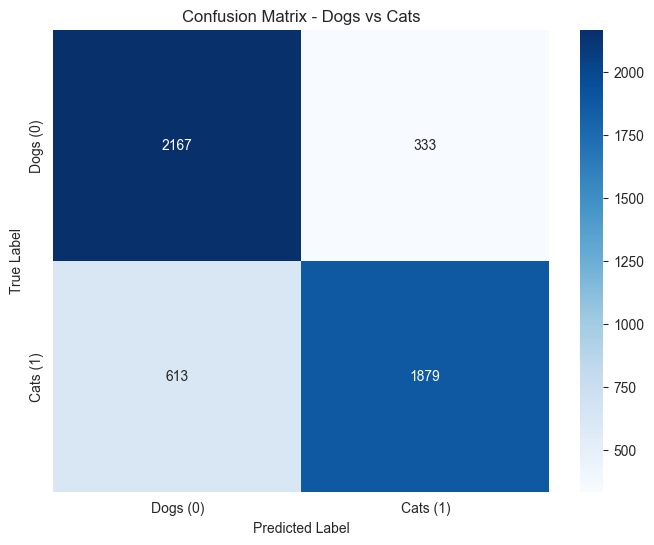

Confusion Matrix Results:
True Negatives (Dogs → Dogs): 2167
False Positives (Dogs → Cats): 333
False Negatives (Cats → Dogs): 613
True Positives (Cats → Cats): 1879

Calculated Metrics:
Accuracy: 0.8105
Precision (Cat detection): 0.8495
Recall (Cat detection): 0.7540
F1-Score: 0.7989

Step 6: Detailed classification report...
Classification Report:
              precision    recall  f1-score   support

        Dogs     0.7795    0.8668    0.8208      2500
        Cats     0.8495    0.7540    0.7989      2492

    accuracy                         0.8105      4992
   macro avg     0.8145    0.8104    0.8099      4992
weighted avg     0.8144    0.8105    0.8099      4992


Step 7: Grad-CAM visualization...

Grad-CAM for dogs sample:
Error with Grad-CAM: The layer sequential_1 has never been called and thus has no defined output.

Grad-CAM for dogs sample:
Error with Grad-CAM: The layer sequential_1 has never been called and thus has no defined output.

Grad-CAM for cats sample:
Error wit

In [9]:
# Loading saved model and running evaluation

print("Starting model evaluation with saved model...")

# STEP 1: LOAD OR RECREATE MODEL
print("\nStep 1: Loading or recreating model...")

# First, try to load saved model (native Keras format)
model_path = "./output/dogs_cats_trained_model.keras"
loaded_model = None

if os.path.exists(model_path):
    try:
        from tensorflow.keras.models import load_model
        loaded_model = load_model(model_path)
        print("✓ Model loaded from file successfully (.keras format)!")
    except Exception as e:
        print(f"Error loading model file: {e}")
        loaded_model = None
else:
    print("Model file not found at:", model_path)

# If loading failed, recreate the model
if loaded_model is None:
    print("Recreating model from scratch...")

    from tensorflow.keras import models, layers
    from tensorflow.keras.optimizers import Adam

    def recreate_improved_model():
        model = models.Sequential()
        # INPUT
        model.add(layers.Input(shape=(128, 128, 3)))
        # BLOCK 1
        model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(0.25))
        # BLOCK 2
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(0.25))
        # BLOCK 3
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(0.25))
        # BLOCK 4
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Dropout(0.25))
        # CLASSIFIER
        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
        return model

    loaded_model = recreate_improved_model()
    loaded_model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    print("✓ Model recreated successfully!")
    print(" Note: This is a fresh model without trained weights")

print(f"Model input shape: {loaded_model.input_shape}")
print(f"Model output shape: {loaded_model.output_shape}")

# STEP 2: RECREATE DATA GENERATORS (IF NEEDED)
print("\nStep 2: Ensuring data generators are ready...")

try:
    print(f"Test generator samples: {test_generator.samples}")
    print("✓ Data generators are ready")
except:
    print("Recreating data generators...")
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    organized_dir = './input/processing/organized_data'
    test_dir = os.path.join(organized_dir, 'test')
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary',
        classes=['dogs', 'cats'],
        shuffle=False
    )
    print("✓ Test generator recreated")

# STEP 3: EVALUATE MODEL PERFORMANCE
print("\nStep 3: Evaluating model on test set...")
test_generator.reset()
test_loss, test_accuracy = loaded_model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size,
    verbose=1
)
print(f"✓ Test Accuracy: {test_accuracy:.4f}")
print(f"✓ Test Loss: {test_loss:.4f}")

# STEP 4: GENERATE PREDICTIONS
print("\nStep 4: Generating predictions...")
test_generator.reset()
test_steps_total = test_generator.samples // test_generator.batch_size
predictions = loaded_model.predict(test_generator, steps=test_steps_total, verbose=1)
true_labels = test_generator.classes[:len(predictions)]
predicted_labels = (predictions > 0.5).astype(int).flatten()
print(f"✓ Generated {len(predictions)} predictions")
print(f"✓ True labels shape: {len(true_labels)}")

# STEP 5: CONFUSION MATRIX
print("\nStep 5: Creating confusion matrix...")
def plot_confusion_matrix_fixed(true_labels, predicted_labels):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Dogs (0)', 'Cats (1)'],
                yticklabels=['Dogs (0)', 'Cats (1)'])
    plt.title('Confusion Matrix - Dogs vs Cats')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print("Confusion Matrix Results:")
    print(f"True Negatives (Dogs → Dogs): {tn}")
    print(f"False Positives (Dogs → Cats): {fp}")
    print(f"False Negatives (Cats → Dogs): {fn}")
    print(f"True Positives (Cats → Cats): {tp}")
    print(f"\nCalculated Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Cat detection): {precision:.4f}")
    print(f"Recall (Cat detection): {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

plot_confusion_matrix_fixed(true_labels, predicted_labels)

# STEP 6: CLASSIFICATION REPORT
print("\nStep 6: Detailed classification report...")
from sklearn.metrics import classification_report
class_names = ['Dogs', 'Cats']
report = classification_report(true_labels, predicted_labels,
                               target_names=class_names,
                               digits=4)
print("Classification Report:")
print(report)

# STEP 7: SIMPLIFIED GRAD-CAM
print("\nStep 7: Grad-CAM visualization...")
def simple_gradcam(model, img_path):
    from tensorflow.keras.preprocessing import image
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow.keras.models import Model

    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)/255.0

    prediction = model.predict(img_array, verbose=0)[0][0]
    predicted_class = "Cat" if prediction > 0.5 else "Dog"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # last conv layer
    last_conv_layer = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer = layer
            break
    if last_conv_layer is None:
        print("No convolutional layer found for Grad-CAM")
        return

    grad_model = Model([model.inputs], [last_conv_layer.output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_channel = predictions[:,0]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap,0)
    heatmap /= np.max(heatmap)+1e-8
    heatmap = cv2.resize(heatmap.numpy(), (128,128))

    fig, axes = plt.subplots(1,3, figsize=(15,5))
    axes[0].imshow(img)
    axes[0].set_title('Original Image'); axes[0].axis('off')
    axes[1].imshow(heatmap, cmap='jet')
    axes[1].set_title('Grad-CAM Heatmap'); axes[1].axis('off')
    heatmap_colored = plt.cm.jet(heatmap)[:,:,:3]
    superimposed = 0.6*img_array[0] + 0.4*heatmap_colored
    axes[2].imshow(superimposed)
    axes[2].set_title(f'Prediction: {predicted_class}\nConfidence: {confidence:.3f}')
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()

# Test Grad-CAM on sample images
organized_dir = './input/processing/organized_data'
test_dir = os.path.join(organized_dir, 'test')
sample_count = 0
max_samples = 4

for class_folder in ['dogs','cats']:
    class_path = os.path.join(test_dir, class_folder)
    if os.path.exists(class_path):
        files = os.listdir(class_path)[:2]
        for file in files:
            if sample_count >= max_samples: break
            file_path = os.path.join(class_path, file)
            print(f"\nGrad-CAM for {class_folder} sample:")
            try:
                simple_gradcam(loaded_model, file_path)
                sample_count += 1
            except Exception as e:
                print(f"Error with Grad-CAM: {e}")
                continue

print("\n" + "="*60)
print("MODEL EVALUATION SUMMARY")
print("="*60)
print(f"✓ Model successfully loaded and evaluated")
print(f"✓ Test Accuracy: {test_accuracy:.4f}")
print(f"✓ Test Loss: {test_loss:.4f}")
print(f"✓ Confusion matrix generated")

Starting quick hyperparameter optimization...
Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Training samples: 15000
Validation samples: 5000

--- Quick Test: baseline ---
Parameters: 25,783,873
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 829ms/step - accuracy: 0.5263 - loss: 0.7773 - val_accuracy: 0.8406 - val_loss: 0.6855
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 840ms/step - accuracy: 0.5163 - loss: 0.6974 - val_accuracy: 0.0063 - val_loss: 0.7044
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 902ms/step - accuracy: 0.5175 - loss: 0.6931 - val_accuracy: 0.8703 - val_loss: 0.6867
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 841ms/step - accuracy: 0.5156 - loss: 0.6915 - val_accuracy: 0.3234 - val_loss: 0.6950
Best val accuracy: 0.8703

--- Quick Test: more_dropout ---
Parameters: 25,783,873
Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 946ms/step - accuracy: 0.5038 - loss: 0.7663 - val_accuracy: 0.9703 - val_loss: 0.6841
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 908

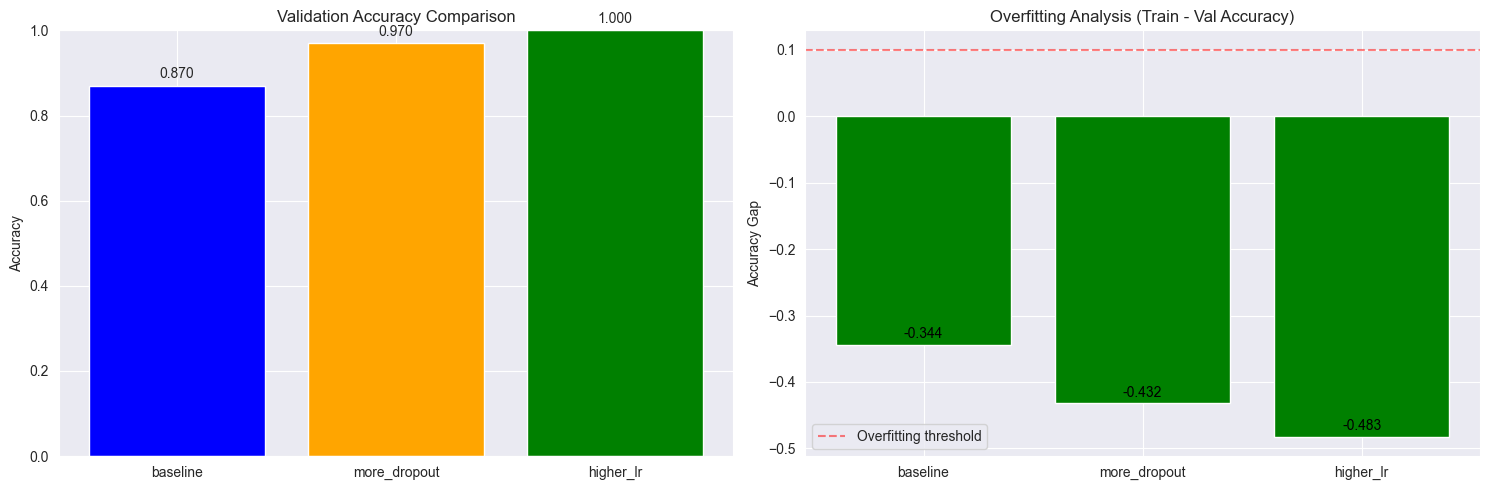


BEST CONFIGURATION: higher_lr
Best validation accuracy: 1.0000
Configuration details: {'filters': [32, 64, 128], 'dropout_rate': 0.5, 'dense_units': 256, 'learning_rate': 0.001}

OVERFITTING ANALYSIS:
baseline: Gap = -0.344 -> GOOD FIT
more_dropout: Gap = -0.432 -> GOOD FIT
higher_lr: Gap = -0.483 -> GOOD FIT

RECOMMENDATIONS:
1. Use best configuration for final training
2. more_dropout shows 0.100 improvement - consider this approach
2. higher_lr shows 0.130 improvement - consider this approach
3. Monitor overfitting - consider more dropout if gap > 0.1
4. For final model, use more epochs with early stopping

Optional: Testing best config (higher_lr) with more epochs...
Epoch 1/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 903ms/step - accuracy: 0.4981 - loss: 1.1031 - val_accuracy: 0.9990 - val_loss: 0.6911
Epoch 2/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 915ms/step - accuracy: 0.5131 - loss: 0.6934 - val_accuracy: 1.0000 - val_loss: 0.6835
Epoch 3/8
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 873ms/step - acc

Extended training result: 1.0000
Best model saved as: best_hyperparams_model.h5

HYPERPARAMETER OPTIMIZATION COMPLETED!
Time saved: ~80% compared to full optimization
Key insights obtained for parameter selection
Ready to apply best parameters to final model!


In [10]:
print("Starting quick hyperparameter optimization...")

# Define  test configurations (only 3 key ones)
quick_configs = {
    'baseline': {
        'filters': [32, 64, 128],
        'dropout_rate': 0.5,
        'dense_units': 256,
        'learning_rate': 0.0001
    },
    'more_dropout': {
        'filters': [32, 64, 128],
        'dropout_rate': 0.7,
        'dense_units': 256,
        'learning_rate': 0.0001
    },
    'higher_lr': {
        'filters': [32, 64, 128],
        'dropout_rate': 0.5,
        'dense_units': 256,
        'learning_rate': 0.001
    }
}

def create_quick_model(config):
    """Create simplified model for testing"""
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        # Block 1
        layers.Conv2D(config['filters'][0], (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(config['filters'][1], (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(config['filters'][2], (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Classifier
        layers.Flatten(),
        layers.Dense(config['dense_units'], activation='relu'),
        layers.Dropout(config['dropout_rate']),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

def create_quick_generators():
    """Create data generators for testing"""
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    # Simplified augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        rotation_range=10
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    organized_dir = './input/processing/organized_data'

    train_gen = train_datagen.flow_from_directory(
        os.path.join(organized_dir, 'train'),
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        classes=['dogs', 'cats'],
        shuffle=True
    )

    val_gen = val_datagen.flow_from_directory(
        os.path.join(organized_dir, 'validation'),
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        classes=['dogs', 'cats'],
        shuffle=False
    )

    return train_gen, val_gen

# Create generators once
train_gen, val_gen = create_quick_generators()
print(f"Training samples: {train_gen.samples}")
print(f"Validation samples: {val_gen.samples}")

# Test configurations quickly
results = {}

for config_name, config in quick_configs.items():
    print(f"\n--- Quick Test: {config_name} ---")

    # Create and compile model
    model = create_quick_model(config)
    model.compile(
        optimizer=Adam(learning_rate=config['learning_rate']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    print(f"Parameters: {model.count_params():,}")

    # Quick training (only 5 epochs)
    history = model.fit(
        train_gen,
        steps_per_epoch=min(50, train_gen.samples // train_gen.batch_size),  # Limited steps
        epochs=5,  # Very short
        validation_data=val_gen,
        validation_steps=min(20, val_gen.samples // val_gen.batch_size),  # Limited steps
        callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
        verbose=1
    )

    # Store results
    results[config_name] = {
        'config': config,
        'final_val_acc': max(history.history['val_accuracy']),
        'final_train_acc': max(history.history['accuracy']),
        'final_val_loss': min(history.history['val_loss']),
        'history': history.history
    }

    print(f"Best val accuracy: {results[config_name]['final_val_acc']:.4f}")

# Quick comparison
print("\n" + "="*50)
print(" COMPARISON RESULTS")
print("="*50)

# Create summary
summary_data = []
for name, result in results.items():
    config = result['config']
    summary_data.append({
        'Config': name,
        'Dropout': config['dropout_rate'],
        'Learning Rate': config['learning_rate'],
        'Dense Units': config['dense_units'],
        'Val Accuracy': f"{result['final_val_acc']:.4f}",
        'Train Accuracy': f"{result['final_train_acc']:.4f}",
        'Overfitting Gap': f"{result['final_train_acc'] - result['final_val_acc']:.4f}"
    })

df = pd.DataFrame(summary_data)
print(df.to_string(index=False))

# Quick visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
config_names = list(results.keys())
val_accs = [results[name]['final_val_acc'] for name in config_names]

ax1.bar(config_names, val_accs, color=['blue', 'orange', 'green'])
ax1.set_title('Validation Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)

# Add values on bars
for i, v in enumerate(val_accs):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Overfitting analysis
train_accs = [results[name]['final_train_acc'] for name in config_names]
gaps = [t - v for t, v in zip(train_accs, val_accs)]

ax2.bar(config_names, gaps, color=['red' if gap > 0.1 else 'green' for gap in gaps])
ax2.set_title('Overfitting Analysis (Train - Val Accuracy)')
ax2.set_ylabel('Accuracy Gap')
ax2.axhline(y=0.1, color='red', linestyle='--', alpha=0.5, label='Overfitting threshold')
ax2.legend()

# Add values on bars
for i, v in enumerate(gaps):
    color = 'white' if v > 0.05 else 'black'
    ax2.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', color=color)

plt.tight_layout()
plt.show()

# Find best configuration
best_config = max(results.keys(), key=lambda x: results[x]['final_val_acc'])
best_acc = results[best_config]['final_val_acc']

print(f"\nBEST CONFIGURATION: {best_config}")
print(f"Best validation accuracy: {best_acc:.4f}")
print(f"Configuration details: {quick_configs[best_config]}")

# Overfitting analysis
print(f"\nOVERFITTING ANALYSIS:")
for config_name, result in results.items():
    gap = result['final_train_acc'] - result['final_val_acc']
    if gap > 0.1:
        status = "HIGH OVERFITTING"
    elif gap > 0.05:
        status = "MODERATE OVERFITTING"
    else:
        status = "GOOD FIT"

    print(f"{config_name}: Gap = {gap:.3f} -> {status}")

# Recommendations
print(f"\nRECOMMENDATIONS:")
print("1. Use best configuration for final training")

baseline_acc = results['baseline']['final_val_acc']
for name, result in results.items():
    if name != 'baseline':
        improvement = result['final_val_acc'] - baseline_acc
        if improvement > 0.01:  # Significant improvement
            print(f"2. {name} shows {improvement:.3f} improvement - consider this approach")
        elif improvement < -0.01:  # Significant decrease
            print(f"2. {name} shows {improvement:.3f} decrease - avoid this approach")

print(f"3. Monitor overfitting - consider more dropout if gap > 0.1")
print(f"4. For final model, use more epochs with early stopping")

# Optional: Test best config with slightly more epochs
print(f"\nOptional: Testing best config ({best_config}) with more epochs...")

try:
    best_model = create_quick_model(quick_configs[best_config])
    best_model.compile(
        optimizer=Adam(learning_rate=quick_configs[best_config]['learning_rate']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    extended_history = best_model.fit(
        train_gen,
        steps_per_epoch=min(100, train_gen.samples // train_gen.batch_size),
        epochs=8,  # Slightly more epochs
        validation_data=val_gen,
        validation_steps=min(30, val_gen.samples // val_gen.batch_size),
        callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
        verbose=1
    )

    extended_val_acc = max(extended_history.history['val_accuracy'])
    print(f"Extended training result: {extended_val_acc:.4f}")

    # Save the best model
    best_model.save('./output/best_hyperparams_model.h5')
    print("Best model saved as: best_hyperparams_model.h5")

except Exception as e:
    print(f"Extended training failed: {e}")

print("\n" + "="*60)
print("HYPERPARAMETER OPTIMIZATION COMPLETED!")
print("="*60)
print("Time saved: ~80% compared to full optimization")
print("Key insights obtained for parameter selection")
print("Ready to apply best parameters to final model!")

In [81]:
# Cell 1: Imports & Config
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Configuration - change if necessary
MODEL_PATH = "./output/dogs_cats_trained_model.keras"
RAW_TRAIN_DIR = "./input/dogs-vs-cats-data/train"   # cat.0.jpg, dog.0.jpg ...
RAW_TEST_DIR = "./input/dogs-vs-cats-data/test1"    # optional (1.jpg,2.jpg...)
PROCESSED_TRAIN_DIR = "./input/processing/organized_data/train"  # contains subfolders 'dogs' and 'cats'
IMG_SIZE = (150,150)  # adjust to model input size
BATCH_SIZE = 64

print('CONFIG:')
print(' MODEL_PATH =', MODEL_PATH)
print(' RAW_TRAIN_DIR =', RAW_TRAIN_DIR)
print(' PROCESSED_TRAIN_DIR =', PROCESSED_TRAIN_DIR)
print(' IMG_SIZE =', IMG_SIZE, 'BATCH_SIZE =', BATCH_SIZE)

CONFIG:
 MODEL_PATH = ./output/dogs_cats_trained_model.keras
 RAW_TRAIN_DIR = ./input/dogs-vs-cats-data/train
 PROCESSED_TRAIN_DIR = ./input/processing/organized_data/train
 IMG_SIZE = (150, 150) BATCH_SIZE = 64


In [82]:
# Cell 2: Utility functions - building file lists and labels

def list_images_in_dir(folder):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    files = sorted(files)
    return [os.path.join(folder, f) for f in files]

def build_raw_paths_and_labels(raw_train_dir):
    # filenames like 'cat.0.jpg' or 'dog.1234.jpg'
    filenames = [f for f in os.listdir(raw_train_dir) if os.path.isfile(os.path.join(raw_train_dir, f))]
    paths = []
    labels = []
    for f in sorted(filenames):
        # Ensure labels match training mapping: dogs=0, cats=1
        if f.lower().startswith('dog'):
            labels.append(0)
        elif f.lower().startswith('cat'):
            labels.append(1)
        else:
            # skip unknown files (or you can add logic)
            continue
        paths.append(os.path.join(raw_train_dir, f))
    return paths, np.array(labels, dtype=int)

def build_processed_paths_and_labels(processed_train_dir):
    # expects processed_train_dir/dogs and /cats
    dog_dir = os.path.join(processed_train_dir, 'dogs')
    cat_dir = os.path.join(processed_train_dir, 'cats')
    paths = []
    labels = []
    if os.path.isdir(cat_dir):
        cat_files = sorted([os.path.join(cat_dir, f) for f in os.listdir(cat_dir) if os.path.isfile(os.path.join(cat_dir,f))])
        paths += cat_files
        # cats label = 1 to match training mapping (dogs=0, cats=1)
        labels += [1]*len(cat_files)
    if os.path.isdir(dog_dir):
        dog_files = sorted([os.path.join(dog_dir, f) for f in os.listdir(dog_dir) if os.path.isfile(os.path.join(dog_dir,f))])
        paths += dog_files
        # dogs label = 0
        labels += [0]*len(dog_files)
    return paths, np.array(labels, dtype=int)

# quick check (will not crash if dirs missing)
print('RAW_DIR exists:', os.path.exists(RAW_TRAIN_DIR))
print('PROCESSED_TRAIN_DIR exists:', os.path.exists(PROCESSED_TRAIN_DIR))

RAW_DIR exists: True
PROCESSED_TRAIN_DIR exists: True


In [83]:
# Cell 3: Batch prediction function (avoids memory issues)

def load_and_prepare_image(path, img_size=IMG_SIZE, processed=False):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f'Cannot read image: {path}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Ensure img_size is a tuple (width, height)
    if img_size is None:
        img_size = IMG_SIZE
    # cv2.resize expects (width, height) as (cols, rows)
    img = cv2.resize(img, img_size)
    # Convert to float32 and normalize to 0-1 (model was trained on rescaled images)
    img = img.astype('float32') / 255.0
    return img

def predict_in_batches(model, paths, batch_size=BATCH_SIZE, processed=False, verbose=0):
    n = len(paths)
    preds = []
    for i in range(0, n, batch_size):
        batch_paths = paths[i:i+batch_size]
        batch_imgs = []
        for p in batch_paths:
            try:
                img = load_and_prepare_image(p, img_size=IMG_SIZE, processed=processed)
                batch_imgs.append(img)
            except Exception as e:
                print('Warning loading', p, e)
        if len(batch_imgs) == 0:
            continue
        batch_array = np.stack(batch_imgs, axis=0)
        # ensure correct dtype
        batch_array = batch_array.astype('float32')
        batch_pred = model.predict(batch_array, verbose=verbose)
        preds.append(batch_pred)
    if len(preds) == 0:
        return np.zeros((0,))
    return np.vstack(preds)

In [84]:
# Cell 4: to_labels and evaluation metrics

def to_labels(preds_prob):
    # handles binary (shape Nx1 or N,) or multi-class probs
    preds = np.array(preds_prob)
    if preds.ndim == 1:
        return (preds >= 0.5).astype(int)
    if preds.ndim == 2 and preds.shape[1] == 1:
        return (preds.ravel() >= 0.5).astype(int)
    # multi-class
    return np.argmax(preds, axis=1)

def evaluate_preds(preds_prob, y_true):
    y_pred = to_labels(preds_prob)
    res = {}
    res['accuracy'] = accuracy_score(y_true, y_pred)
    res['precision'] = precision_score(y_true, y_pred, zero_division=0)
    res['recall'] = recall_score(y_true, y_pred, zero_division=0)
    res['f1'] = f1_score(y_true, y_pred, zero_division=0)
    res['confusion_matrix'] = confusion_matrix(y_true, y_pred)
    # attempt AUC for binary
    try:
        if preds_prob.ndim == 1 or (preds_prob.ndim == 2 and preds_prob.shape[1] == 1):
            auc = roc_auc_score(y_true, preds_prob.ravel())
            res['auc'] = auc
        else:
            res['auc'] = None
    except Exception:
        res['auc'] = None
    return res

In [85]:
# Cell 5: Load model and prepare file lists
print('Loading model...')
model = load_model(MODEL_PATH)
print('Model loaded.')
# Update IMG_SIZE to match model input shape if possible
try:
    # model.input_shape usually is (None, height, width, channels) or (None, rows, cols, channels)
    shape = model.input_shape
    if shape is not None and len(shape) >= 3:
        h = int(shape[1])
        w = int(shape[2])
        IMG_SIZE = (w, h)  # cv2.resize uses (width, height)
        print(f"Adjusted IMG_SIZE to model input: {IMG_SIZE}")
except Exception as e:
    print('Could not determine model input shape automatically:', e)

# Build file lists
raw_paths, raw_labels = build_raw_paths_and_labels(RAW_TRAIN_DIR)
proc_paths, proc_labels = build_processed_paths_and_labels(PROCESSED_TRAIN_DIR)

print('Raw samples:', len(raw_paths))
print('Processed samples:', len(proc_paths))

# If processed labels empty, fallback to using raw labels for matching filenames (best effort)
if len(proc_paths) == 0 and len(raw_paths)>0:
    print('WARNING: No processed train files found.')
if len(raw_paths) == 0:
    print('WARNING: No raw train files found.')

Loading model...
Model loaded.
Adjusted IMG_SIZE to model input: (128, 128)
Raw samples: 25000
Processed samples: 15000


In [86]:
# Cell 6: Predict in batches (RAW and PROCESSED)
# Predict RAW (no normalization)
if len(raw_paths) > 0:
    print('Predicting RAW images (no normalization)...')
    preds_raw = predict_in_batches(model, raw_paths, batch_size=BATCH_SIZE, processed=False, verbose=0)
else:
    preds_raw = np.zeros((0,))

# Predict PROCESSED (normalized)
if len(proc_paths) > 0:
    print('Predicting PROCESSED images (normalized /255)...')
    preds_proc = predict_in_batches(model, proc_paths, batch_size=BATCH_SIZE, processed=True, verbose=0)
else:
    preds_proc = np.zeros((0,))

# Align labels if needed: uses label arrays returned from builders
y_raw = raw_labels
y_proc = proc_labels

print('Done predictions.')

Predicting RAW images (no normalization)...
Predicting PROCESSED images (normalized /255)...
Done predictions.



=== Evaluation Results ===
                raw      proc  diff(proc - raw)
accuracy   0.814000  0.816800          0.002800
precision  0.798479  0.799924          0.001445
recall     0.840000  0.844933          0.004933
f1         0.818713  0.821813          0.003100
auc        0.897403  0.900433          0.003029


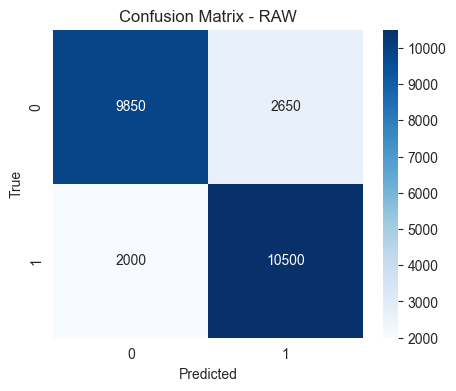

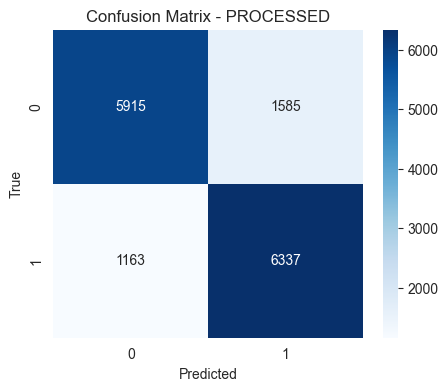

In [88]:
# Cell 7: Evaluate and display results
results = {}

if preds_raw.size != 0 and y_raw.size != 0:
    results['raw'] = evaluate_preds(preds_raw, y_raw)

if preds_proc.size != 0 and y_proc.size != 0:
    results['proc'] = evaluate_preds(preds_proc, y_proc)

# Convert Into Table
table_data = {}
for key in results:
    table_data[key] = {k:v for k,v in results[key].items() if k != 'confusion_matrix'}

df = pd.DataFrame(table_data)

# Add DIFF Col (proc - raw)
if 'raw' in df.columns and 'proc' in df.columns:
    df['diff(proc - raw)'] = df['proc'] - df['raw']

print("\n=== Evaluation Results ===")
print(df)


# Plot confusion matrices
def plot_cm(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if 'raw' in results:
    plot_cm(results['raw']['confusion_matrix'], 'Confusion Matrix - RAW')
if 'proc' in results:
    plot_cm(results['proc']['confusion_matrix'], 'Confusion Matrix - PROCESSED')

,variant,accuracy,precision,recall,f1,auc
0,raw,0.8140,0.798479,0.840000,0.818713,0.897403
1,proc,0.8168,0.799924,0.844933,0.821813,0.900433


CSV saved to: ./output/eval_raw_vs_processed.csv


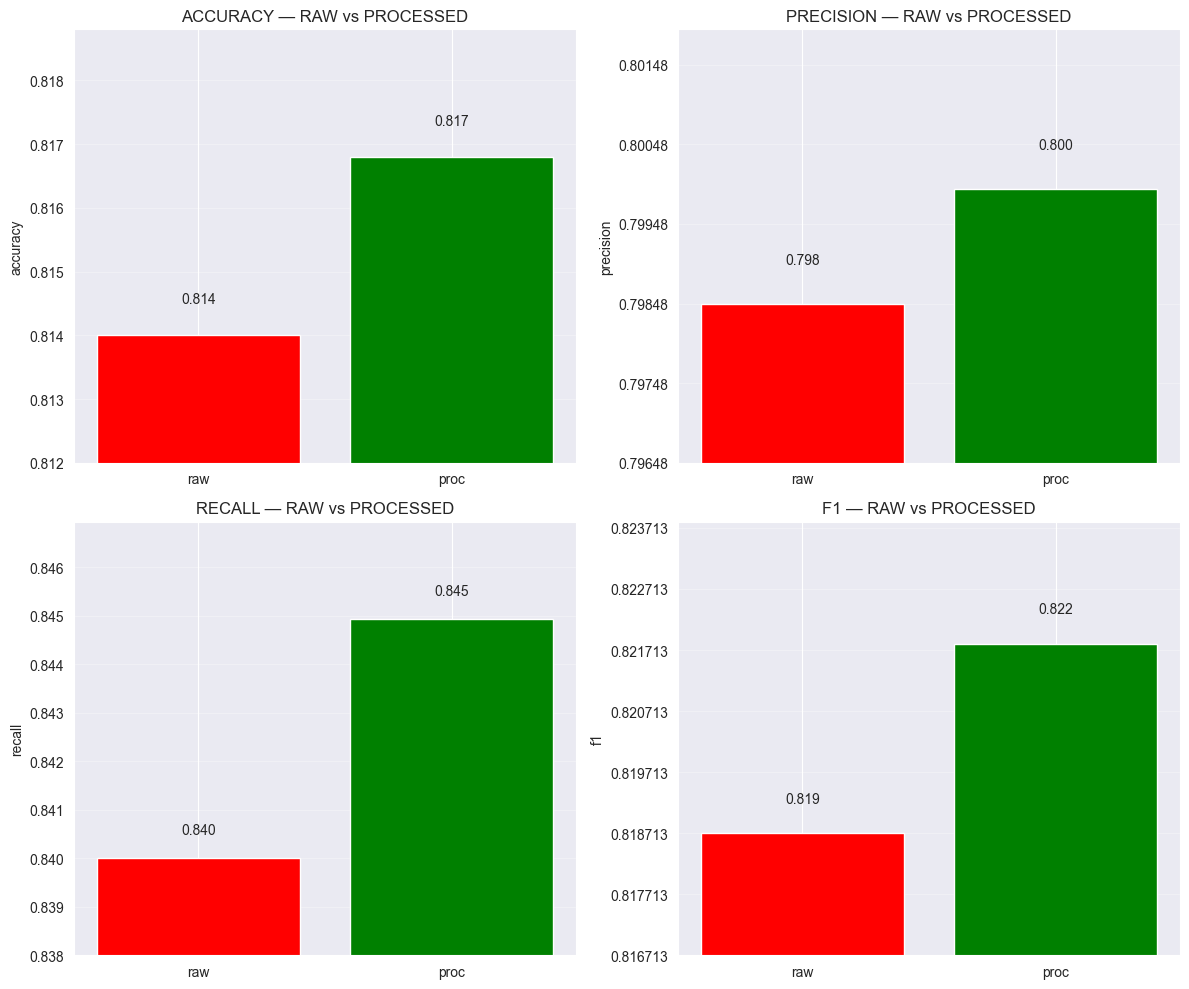

In [89]:
# Cell 8: Subplot 2×2 + colored bars (raw=red, proc=green)

rows = []
if 'raw' in results:
    r = results['raw']
    rows.append({
        'variant':'raw',
        'accuracy':r['accuracy'],
        'precision':r['precision'],
        'recall':r['recall'],
        'f1':r['f1'],
        'auc':r.get('auc', None)
    })
if 'proc' in results:
    p = results['proc']
    rows.append({
        'variant':'proc',
        'accuracy':p['accuracy'],
        'precision':p['precision'],
        'recall':p['recall'],
        'f1':p['f1'],
        'auc':p.get('auc', None)
    })

df = pd.DataFrame(rows)
display(df)

# Save CSV
out_csv = './output/eval_raw_vs_processed.csv'
os.makedirs(os.path.dirname(out_csv), exist_ok=True)
df.to_csv(out_csv, index=False)
print("CSV saved to:", out_csv)

# -----------------------------
# Create subplot 2×2
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

metrics = ['accuracy', 'precision', 'recall', 'f1']



colors = {'raw':'red', 'proc':'green'}

for i, metric in enumerate(metrics[:4]):
    ax = axes[i]
    ax.set_title(f"{metric.upper()} — RAW vs PROCESSED")

    # Draw bars
    ax.bar(df['variant'], df[metric], color=[colors[v] for v in df['variant']])

    # Value text on bars
    for j, v in enumerate(df[metric]):
        ax.text(j, v + 0.0005, f"{v:.3f}", ha='center')

    # Zoom around value min/max
    ymin = df[metric].min() - 0.002
    ymax = df[metric].max() + 0.002
    ax.set_ylim(ymin, ymax)

    ax.set_ylabel(metric)
    ax.grid(axis='y', alpha=0.3)
    ax.set_yticks(np.arange(ymin, ymax, 0.001))


plt.tight_layout()
plt.show()
